# libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# colors

In [2]:
arg_9 = [(116/255,172/255,223/255,1),
         (38/255,136/255,227/255,1),
         (2/255,84/255,162/255,1),
         (0/255,143/255,131/255,1),
         (158/255,158/255,38/255,1),
         (125/255,199/255,128/255,1),
         (204/255,250/255,125/255,1),
         (225/255,215/255,70/255,1),
         (246/255,180/255,14/255,1),]

# order of classes

In [5]:
def permutate(a, order = [2,6,3,4,1,5,9,7,8]):
    zp = np.array( list( zip(a, order)) )
    new_order = sorted(zp, key=(lambda x:x[1]))
    return(np.array(new_order)[:,0])

In [6]:
algo = ['LR','kNN', 'SVM', 'RF', 'XGB', 'NN1', 'NN5', 'QNN', 'PNN']
new_algo_order = permutate(algo)
print(new_algo_order)

['XGB' 'LR' 'SVM' 'RF' 'NN1' 'kNN' 'QNN' 'PNN' 'NN5']


# bar plot function

In [10]:
def bar_plot(mean_zp, ci_zp, color_series = arg_9, filename = None):
    algo = new_algo_order
    metrics = len(mean_zp[0])
    classes = len(mean_zp)
    total_width = (classes)/classes+1
    width = 1 / (classes+1)
    x = np.arange(metrics)
    plt.figure(dpi=350)
    for i in range(len(mean_zp)):
        plt.bar(x + width*(i+1), mean_zp[i], yerr= ci_zp[i], width=width, label=algo[i], capsize = 3, align = 'center', color = color_series[i])

    plt.xlabel('Datasets')
    plt.ylabel('AUROC(%)')

    axes = plt.gca()
    axes.set_xlim([-width/2, metrics + width/2])
    axes.set_ylim([50, 100])
    axes.set_title('AUROC of different algorithms')
    plt.xticks([1/2+i for i in range(metrics)] ,['Mass spectrometry','Urinalysis','3rd'])

    plt.legend(loc='upper left', ncol=3, fontsize='small')
    plt.show()
    if filename != None:
        plt.savefig(filename, dpi=300)

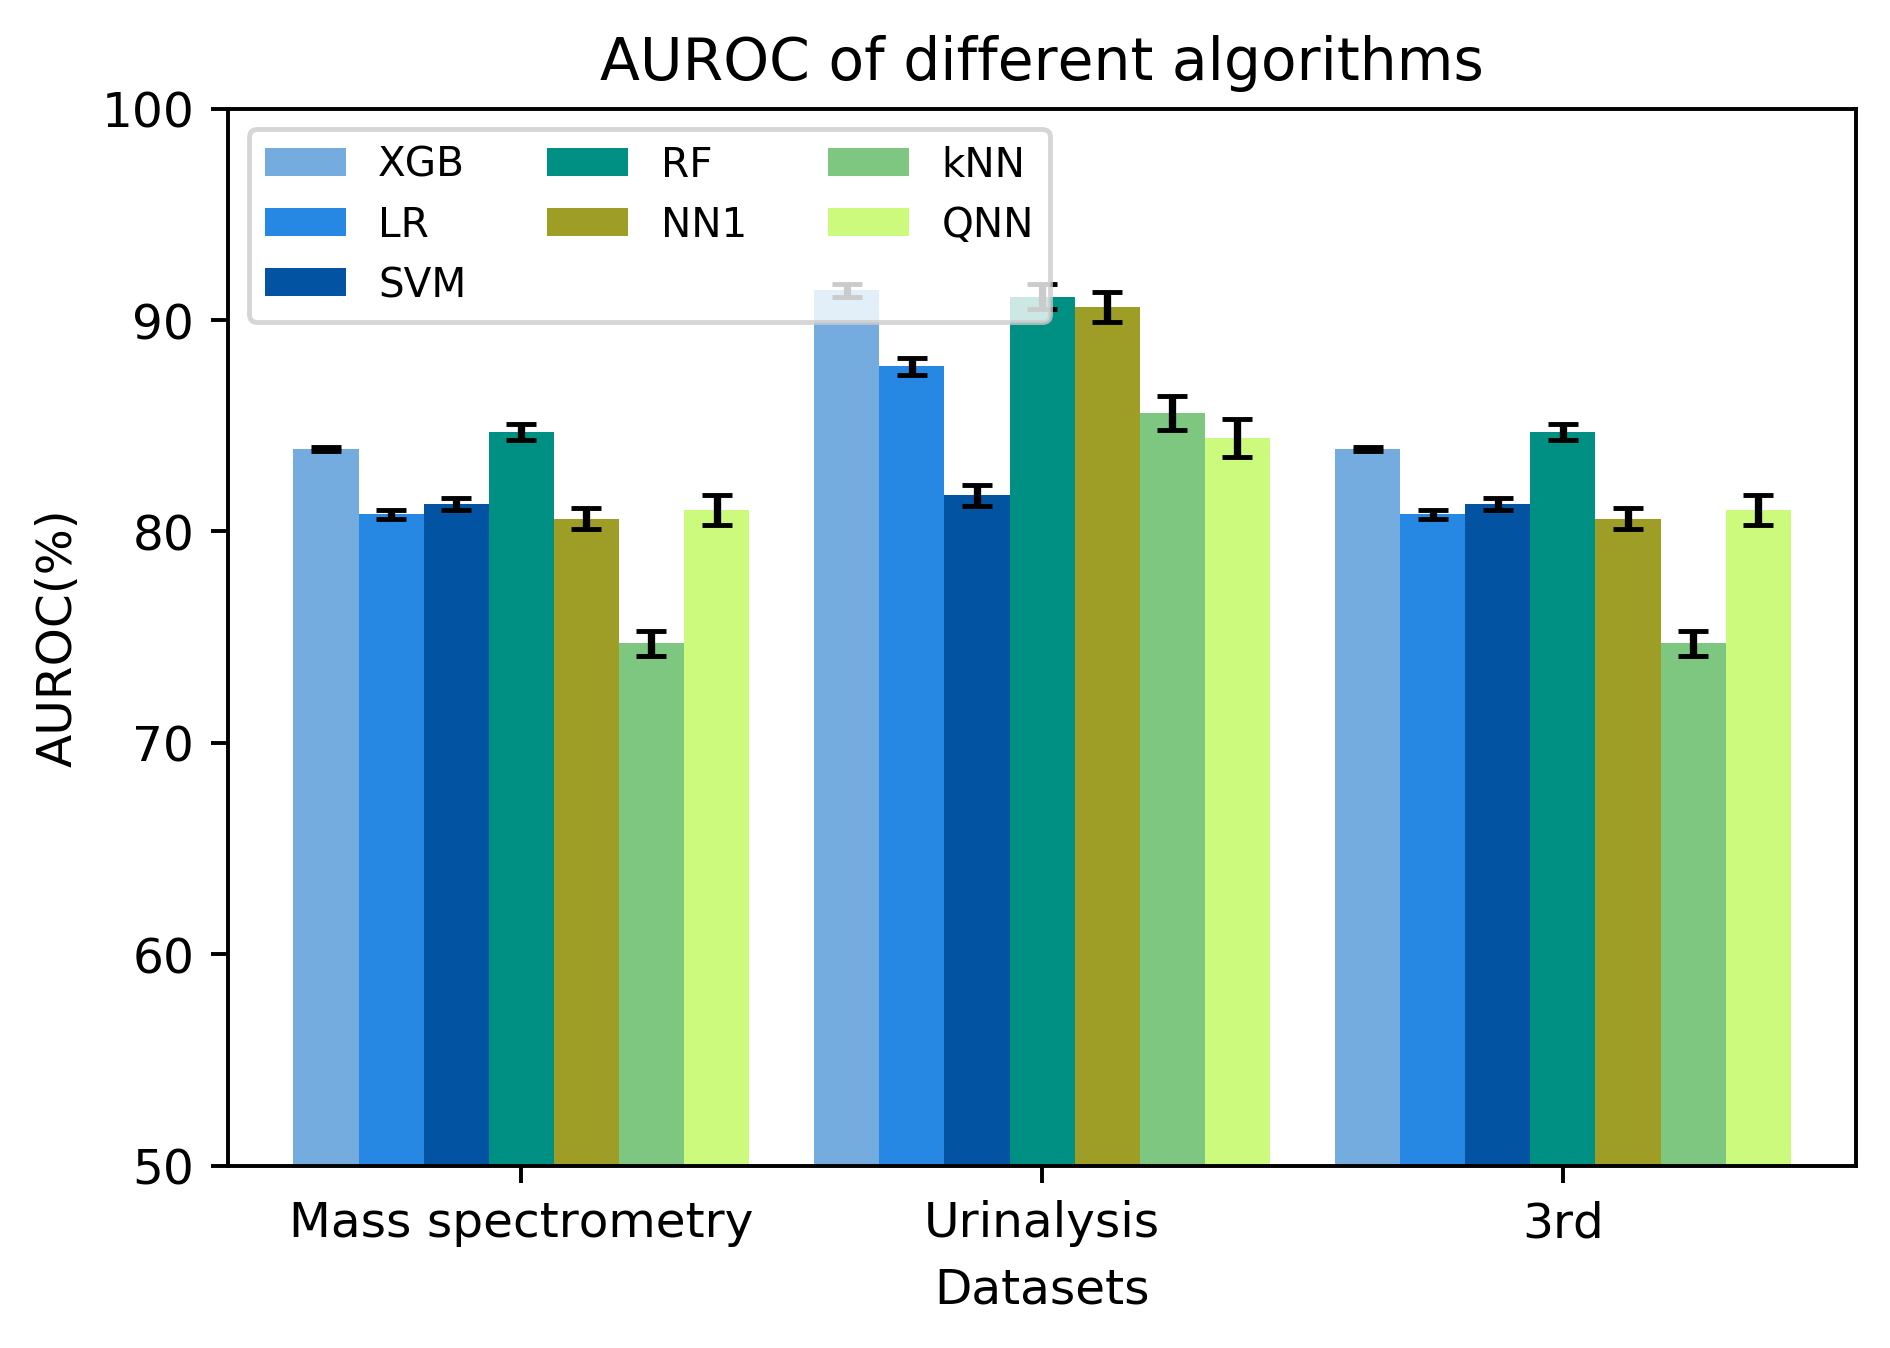

In [11]:
# AUC
or_MRSA_auc_avg   = [80.8, 74.7, 81.3, 84.7, 83.9, 80.6, 81.0]
or_MRSA_auc_ci_max= [83.0, 77.1, 83.5, 86.6, 85.9, 82.8, 83.2]
or_Tri_auc_avg    = [87.8, 85.6, 81.7, 91.1, 91.4, 90.6, 84.4]
or_Tri_auc_ci_max = [90.5, 88.3, 84.4, 92.9, 93.2, 92.5, 87.2]

new_MRSA_auc_avg = permutate(or_MRSA_auc_avg)
new_MRSA_auc_ci_max  = permutate(or_MRSA_auc_ci_max)
new_Tri_auc_avg = permutate(or_Tri_auc_avg)
new_Tri_auc_ci_max  = permutate(or_Tri_auc_ci_max)


ci_1 = [i/10+0.1 for i in range(9)]
ci_2 = [i/10+0.3 for i in range(9)]
the_mean_zp = list(zip(new_MRSA_auc_avg,new_Tri_auc_avg,new_MRSA_auc_avg))
the_ci_zp = list(zip(ci_1,ci_2,ci_1))

bar_plot(the_mean_zp,the_ci_zp)